# Lab: Linear Regression

## Libraries / Data

Basic imports and Boston dataset loading

In [17]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

boston = pd.read_csv('../datasets/boston.csv', index_col=False)

We will seek to predict __medv__ using 13 predictors such as __rm__ (average number of rooms per house), __age__ (average age of houses), and __lstat__ (percent of households with low socioeconomic status).

In [23]:
"[{}]".format(', '.join(boston.columns.tolist()))

'[crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat, medv]'

We will start by using the `OLS` function to fit a simple linear regression model, with __medv__ as the response and __lstat__ as the predictor.

_Note: we'll use the `statsmodels` package instead of `sklearn` because of the additional statistical information on the linear regression functions/classes._

In [36]:
import statsmodels.api as sm

X = boston.lstat
X = sm.add_constant(X) # this is needed to add an intercept to our linear model.
y = boston.medv

model = sm.OLS(y, X)
results = model.fit();

For more detailed information, we use `results.summary()`. This gives us p-values and standard errors for the coefficients, as well as the R2 statistic and F-statistic for the model.

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           5.08e-88
Time:                        10:36:29   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In order to obtain a confidence interval for the coefficient estimates, we can use the `results.conf_int()` method.

In [58]:
results.conf_int()

,0,1
const,33.448457,35.659225
lstat,-1.026148,-0.873951


We can use OLS `predict` method to estimate __medv__ based on new __lstat__ values

In [52]:
Xtest = [5, 10, 15]
Xtest = sm.add_constant(Xtest)

In [57]:
results.predict(Xtest)

array([29.80359411, 25.05334734, 20.30310057])

The `summary_frame()` function can be used to produce confidence intervals and prediction intervals for the prediction of __medv__ for a given value of __lstat__.

__confidence intervals__

In [64]:
prediction = results.get_prediction(Xtest)
pred_summary = prediction.summary_frame()
pred_summary[['mean', 'mean_ci_lower', 'mean_ci_upper']]

,mean,mean_ci_lower,mean_ci_upper
0,29.803594,29.007412,30.599776
1,25.053347,24.474132,25.632563
2,20.303101,19.731588,20.874613


__prediction intervals__

In [67]:
pred_summary[['mean', 'obs_ci_lower', 'obs_ci_upper']]

,mean,obs_ci_lower,obs_ci_upper
0,29.803594,17.565675,42.041513
1,25.053347,12.827626,37.279068
2,20.303101,8.077742,32.528459


We will now plot __medv__ and __lstat__ along with the least squares regression line using matplotlib.

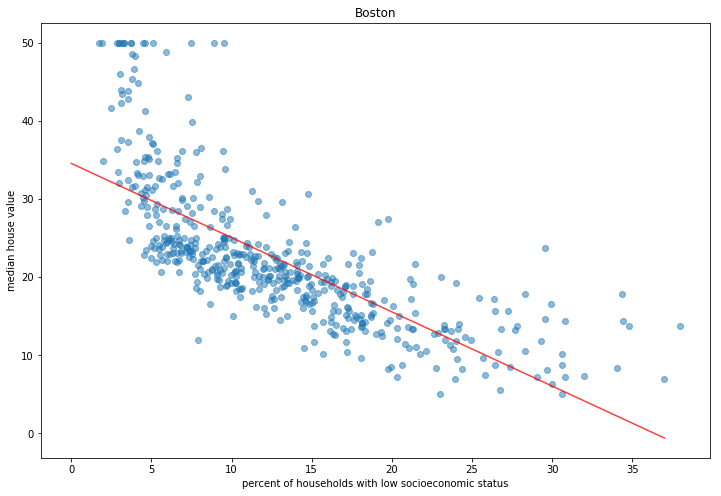

In [86]:
_, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.scatter(boston.lstat, boston.medv, alpha=0.5)

# regression line.
intercept, slope = results.params
xs = np.arange(0, max(boston.lstat))
ys = [intercept + x * slope for x in xs]
ax.plot(xs, ys, color='r', alpha=0.75)
ax.set_xlabel('percent of households with low socioeconomic status')
ax.set_ylabel('median house value')
ax.set_title('Boston');